In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [56]:
def compute_loss(y, y_pred): #Binary Cross-Entropy Loss
    return -(np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

In [57]:
def logistic_regression(X, y, lr=0.01, num_iters = 10000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    losses = []
    params = []

    for i in range(num_iters):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15) 
        e = y_pred - y
        dJ_dw = np.mean(np.dot(X.T,e))
        dJ_db = np.mean(e)

        weights -= lr * dJ_dw
        bias -= lr * dJ_db

        params.append([weights, bias])

        loss = compute_loss(y,y_pred)
        losses.append(loss)

    return weights, bias, losses        

In [ ]:
def predict(X, weights, bias):
    """Predict probabilities and class labels for new data."""
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    y_pred_labels = (y_pred >= 0.5).astype(int)
    return y_pred, y_pred_labels

In [59]:
np.random.seed(42)
num_samples = 100
X = np.random.rand(num_samples, 2) * 10  
y = (X[:, 0] + X[:, 1] > 10).astype(int)

In [60]:
weights, bias, losses = logistic_regression(X, y)

print(f"Final Weights: {weights}")
print(f"Final Bias: {bias}")

Final Weights: [0.72273381 0.72273381]
Final Bias: -12.494771212933468


In [ ]:

new_data = np.array([[0.3, 0.7], [0.6, 0.8], [0.1, 0.2]])  
y_pred, y_pred_labels = predict(new_data, weights, bias)

print("\nPredicted probabilities:", y_pred)
print("Predicted labels:", y_pred_labels)

y_train_pred, _ = predict(X, weights, bias)
train_loss = compute_loss(y, y_train_pred)
print("\nTraining loss:", train_loss)


Predicted probabilities: [7.71730673e-06 1.03042494e-05 4.65319851e-06]
Predicted labels: [0 0 0]

Training loss: 1.2363857447153042


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
model = LogisticRegression()

model.fit(X, y)
y_pred = model.predict(X)

print(f"Final Weights: {model.coef_}")
print(f"Final Bias: {model.intercept_}")

Final Weights: [[1.84351524 1.73785373]]
Final Bias: [-18.2013827]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 0.47
MAE: 0.47
R²: -0.8830128205128207


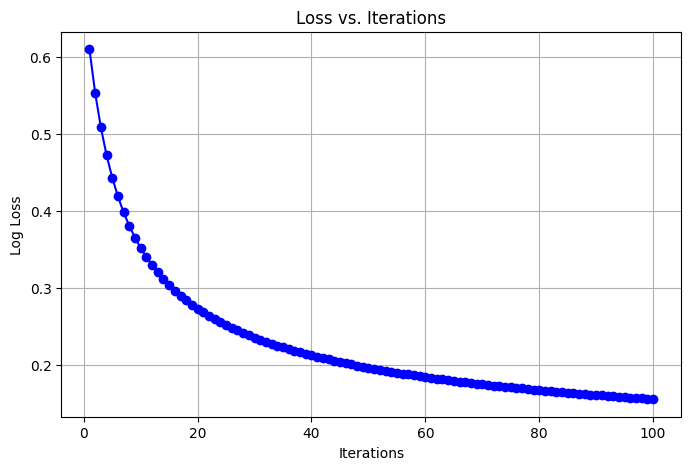

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

np.random.seed(0)
X = np.random.rand(100, 2)  
y = (X[:, 0] + X[:, 1] > 1).astype(int) 

model = SGDClassifier(loss='log_loss', max_iter=1, learning_rate='constant', eta0=0.1, random_state=0, warm_start=True)

losses = [] 

for epoch in range(100): 
    model.partial_fit(X, y, classes=np.unique(y))  
    y_pred_prob = model.predict_proba(X)[:, 1]  
    loss = log_loss(y, y_pred_prob)  
    losses.append(loss)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(losses) + 1), losses, marker='o', linestyle='-', color='b')
plt.title("Loss vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.grid()
plt.show()
